<b>Web Analytics DATA 620 - Project 01</b>

<b>Assignment: “Centrality Measures”</b>

<b>Group - Chris Bloome / Mustafa Telab / Vinayak Kamath</b>

<b>Date - 16th June 2021</b>

--- 

For your first project, you are asked to

Identify and load a network dataset that has some categorical information available for each node.
For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
Compare your centrality measures across your categorical groups.


---

<b>Bike Share Systems (BSS) collection - Citi Bike Trip Histories - New York City</b>



Experience NYC in a whole new way - Citi Bike is the nation's largest bike share program, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

The source of the data is citibikenyc.com; The csv file <b>data</b> includes:

 - Trip Duration (seconds)
 - Start Time and Date
 - Stop Time and Date
 - Start Station Name
 - End Station Name
 - Station ID
 - Station Lat/Long
 - Bike ID
 - User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
 - Gender (Zero=unknown; 1=male; 2=female)
 - Year of Birth

For our analysis here we are using data of April 2021 month.


<table  style="float:left">
    <tr><th>Name</th><th>Date Modified</th><th>Size</th><th>Type</th></tr>
    <tr><td>202104-citibike-tripdata.csv.zip</td><td>May 7th 2021, 10:56:18 am</td><td>89.92 MB</td><td>ZIP file (csv)</td></tr>
</table>


<b>Analysis Plan</b>
1. We will load the csv data into a temp object and then pull the distinct nodes and its characteristics and the linkages between the nodes.
  - The Nodes represent the User, the bikes,  and the Stations. The User node having characterisitics of Type, Gender, and Year of birth and the Station node having the characteristics of  latitude and logitude. The Bike node has no characteristics other then a unique Id.
  - The linkages represet the trips between start station and stop station.

2. Degree centrality is defined as the Number of incoming links to a node. We can check the station having the maximum number of trips to it and we can further to see if the same station has the maximum degree centrality for each gender type and/or user types. 


---

In [1]:
#Import required libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.pyplot import figure
from networkx_query import search_nodes, search_edges


We will firsrt load the data CSV data file into a panda dataframe.

In [2]:
#loading csv file 
df = pd.read_csv('201306-citibike-tripdata.csv')

#Droping NAN value rows
df = df.replace('',np.nan)
df = df.dropna(axis="rows", how="any")

#Cleaning up the data for the column `gender` to convert the categorical values Zero=unknown; 1=male; 2=female;
df['gender'].replace(to_replace=[0, 1, 2], value=['unknown', 'male', 'female'], inplace=True)

In [3]:
#Viewing the data
df

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,695,6/1/2013 0:00,6/1/2013 0:11,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,male
1,693,6/1/2013 0:00,6/1/2013 0:11,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,male
3,123,6/1/2013 0:01,6/1/2013 0:03,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,male
4,1521,6/1/2013 0:01,6/1/2013 0:26,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,male
6,2057,6/1/2013 0:02,6/1/2013 0:36,285,Broadway & E 14 St,40.734546,-73.990741,532.0,S 5 Pl & S 5 St,40.710451,-73.960876,15693,Subscriber,1991.0,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577687,436,6/30/2013 23:58,7/1/2013 0:05,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,403.0,E 2 St & 2 Ave,40.725029,-73.990697,19454,Subscriber,1982.0,male
577689,185,6/30/2013 23:57,7/1/2013 0:00,323,Lawrence St & Willoughby St,40.692362,-73.986317,293.0,Lafayette St & E 8 St,40.730207,-73.991026,16746,Subscriber,1982.0,male
577690,595,6/30/2013 23:58,7/1/2013 0:08,360,William St & Pine St,40.707179,-74.008873,329.0,Greenwich St & North Moore St,40.720152,-74.010365,19290,Subscriber,1985.0,male
577698,925,6/30/2013 23:59,7/1/2013 0:14,509,9 Ave & W 22 St,40.745497,-74.001971,462.0,W 22 St & 10 Ave,40.746920,-74.004519,15250,Subscriber,1964.0,male


In [4]:
#creating the networkx graph object
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df, source='start_station_name', target ='end_station_name'
                            , edge_attr=['tripduration','bikeid','usertype','birth_year','gender']
                            , create_using=nx.MultiDiGraph(directed=True))

In [5]:
print(nx.info(G))

Name: 
Type: MultiDiGraph
Number of nodes: 337
Number of edges: 326841
Average in degree: 969.8546
Average out degree: 969.8546


Next, we’ll materialize the graph we created with the help of matplotlib for formatting.

In [6]:
#figure(figsize=(30, 24))
#nx.draw_kamada_kawai(G, arrows=True, with_labels=True,  node_color='#00b4d9'
#                     , font_color='red', font_size =25, font_weight='bold')

We will now analyze Degree centrality for our graph as defined as the Number of incoming links to a node. We can check the station having the maximum number of trips to it by using the in_degree method.

In [7]:
leaderboard = {}
for x in G.nodes:
 leaderboard[x] = G.in_degree[x]
s = pd.Series(leaderboard, name='in_connections')
df2 = s.to_frame().sort_values('in_connections', ascending=False)

In [8]:
df2.head()

,in_connections
E 17 St & Broadway,3527
W 20 St & 11 Ave,3205
Broadway & E 14 St,3044
Broadway & W 24 St,2816
Lafayette St & E 8 St,2687


Based on above we can see that "E 17 St & Broadway"has the max in connection or degree centrality for the month of April, 2021.

we can further check if this holds true for each gender type and/or user types

In [9]:
#dataframe having male gender dataset
df_male = df[df['gender']=='male']

#creating the networkx graph object
Graphtype = nx.Graph()
G_Male = nx.from_pandas_edgelist(df_male, source='start_station_name', target ='end_station_name'
                            , edge_attr=['tripduration','bikeid','usertype','birth_year','gender']
                            , create_using=nx.MultiDiGraph())

leaderboard = {}
for x in G_Male.nodes:
 leaderboard[x] = G_Male.in_degree[x]
s = pd.Series(leaderboard, name='in_connections')
df_male_2 = s.to_frame().sort_values('in_connections', ascending=False)

In [10]:
df_male_2.head()

,in_connections
E 17 St & Broadway,2703
W 20 St & 11 Ave,2462
Broadway & E 14 St,2285
Broadway & W 24 St,2253
8 Ave & W 31 St N,2121


In [11]:
#dataframe having male gender dataset
df_female = df[df['gender']=='female']

#creating the networkx graph object
Graphtype = nx.Graph()
G_Female = nx.from_pandas_edgelist(df_female, source='start_station_name', target ='end_station_name'
                            , edge_attr=['tripduration','bikeid','usertype','birth_year','gender']
                            , create_using=nx.MultiDiGraph())

leaderboard = {}
for x in G_Female.nodes:
 leaderboard[x] = G_Female.in_degree[x]
s = pd.Series(leaderboard, name='in_connections')
df_female_2 = s.to_frame().sort_values('in_connections', ascending=False)

In [12]:
df_female_2.head()

,in_connections
E 17 St & Broadway,821
Broadway & E 14 St,758
W 20 St & 11 Ave,739
West Thames St,663
Lafayette St & E 8 St,601


We can see from above that the station "E 17 St & Broadway"has the max in connection or degree centrality overall and in male and female gender types.

We can further check if this holds true for each user type as Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member

In [13]:
#dataframe having Subscriber usertype dataset
df_subscriber = df[df['usertype']=='Subscriber']

#creating the networkx graph object
Graphtype = nx.Graph()
G_Subscriber = nx.from_pandas_edgelist(df_subscriber, source='start_station_name', target ='end_station_name'
                            , edge_attr=['tripduration','bikeid','usertype','birth_year','gender']
                            , create_using=nx.MultiDiGraph())

leaderboard = {}
for x in G_Subscriber.nodes:
 leaderboard[x] = G_Subscriber.in_degree[x]
s = pd.Series(leaderboard, name='in_connections')
df_subscriber_2 = s.to_frame().sort_values('in_connections', ascending=False)

In [14]:
df_subscriber_2.head()

,in_connections
E 17 St & Broadway,3527
W 20 St & 11 Ave,3205
Broadway & E 14 St,3044
Broadway & W 24 St,2816
Lafayette St & E 8 St,2687


We can see from above that the station "E 17 St & Broadway" has the max in connection or degree centrality for user type "Subscriber" too.

We will now draw the graph centering at the station "E 17 St & Broadway"

In [15]:
#dataframe having 'E 17 St & Broadway' end_station_name dataset
df_location = df[df['end_station_name']=='E 17 St & Broadway']
df_location = df_location[["start_station_name", "end_station_name"]]
df_location = df_location.drop_duplicates()

#creating the networkx graph object
Graphtype = nx.Graph()
G_location = nx.from_pandas_edgelist(df_location, source='start_station_name', target ='end_station_name'
                            , create_using=nx.DiGraph())

In [16]:
df_location

,start_station_name,end_station_name
459,Lexington Ave & E 29 St,E 17 St & Broadway
489,2 Ave & E 58 St,E 17 St & Broadway
512,W 47 St & 10 Ave,E 17 St & Broadway
513,E 19 St & 3 Ave,E 17 St & Broadway
516,1 Ave & E 44 St,E 17 St & Broadway
...,...,...
489663,E 55 St & 2 Ave,E 17 St & Broadway
503113,Broadway & Berry St,E 17 St & Broadway
551623,Lefferts Pl & Franklin Ave,E 17 St & Broadway
560975,E 37 St & Lexington Ave,E 17 St & Broadway


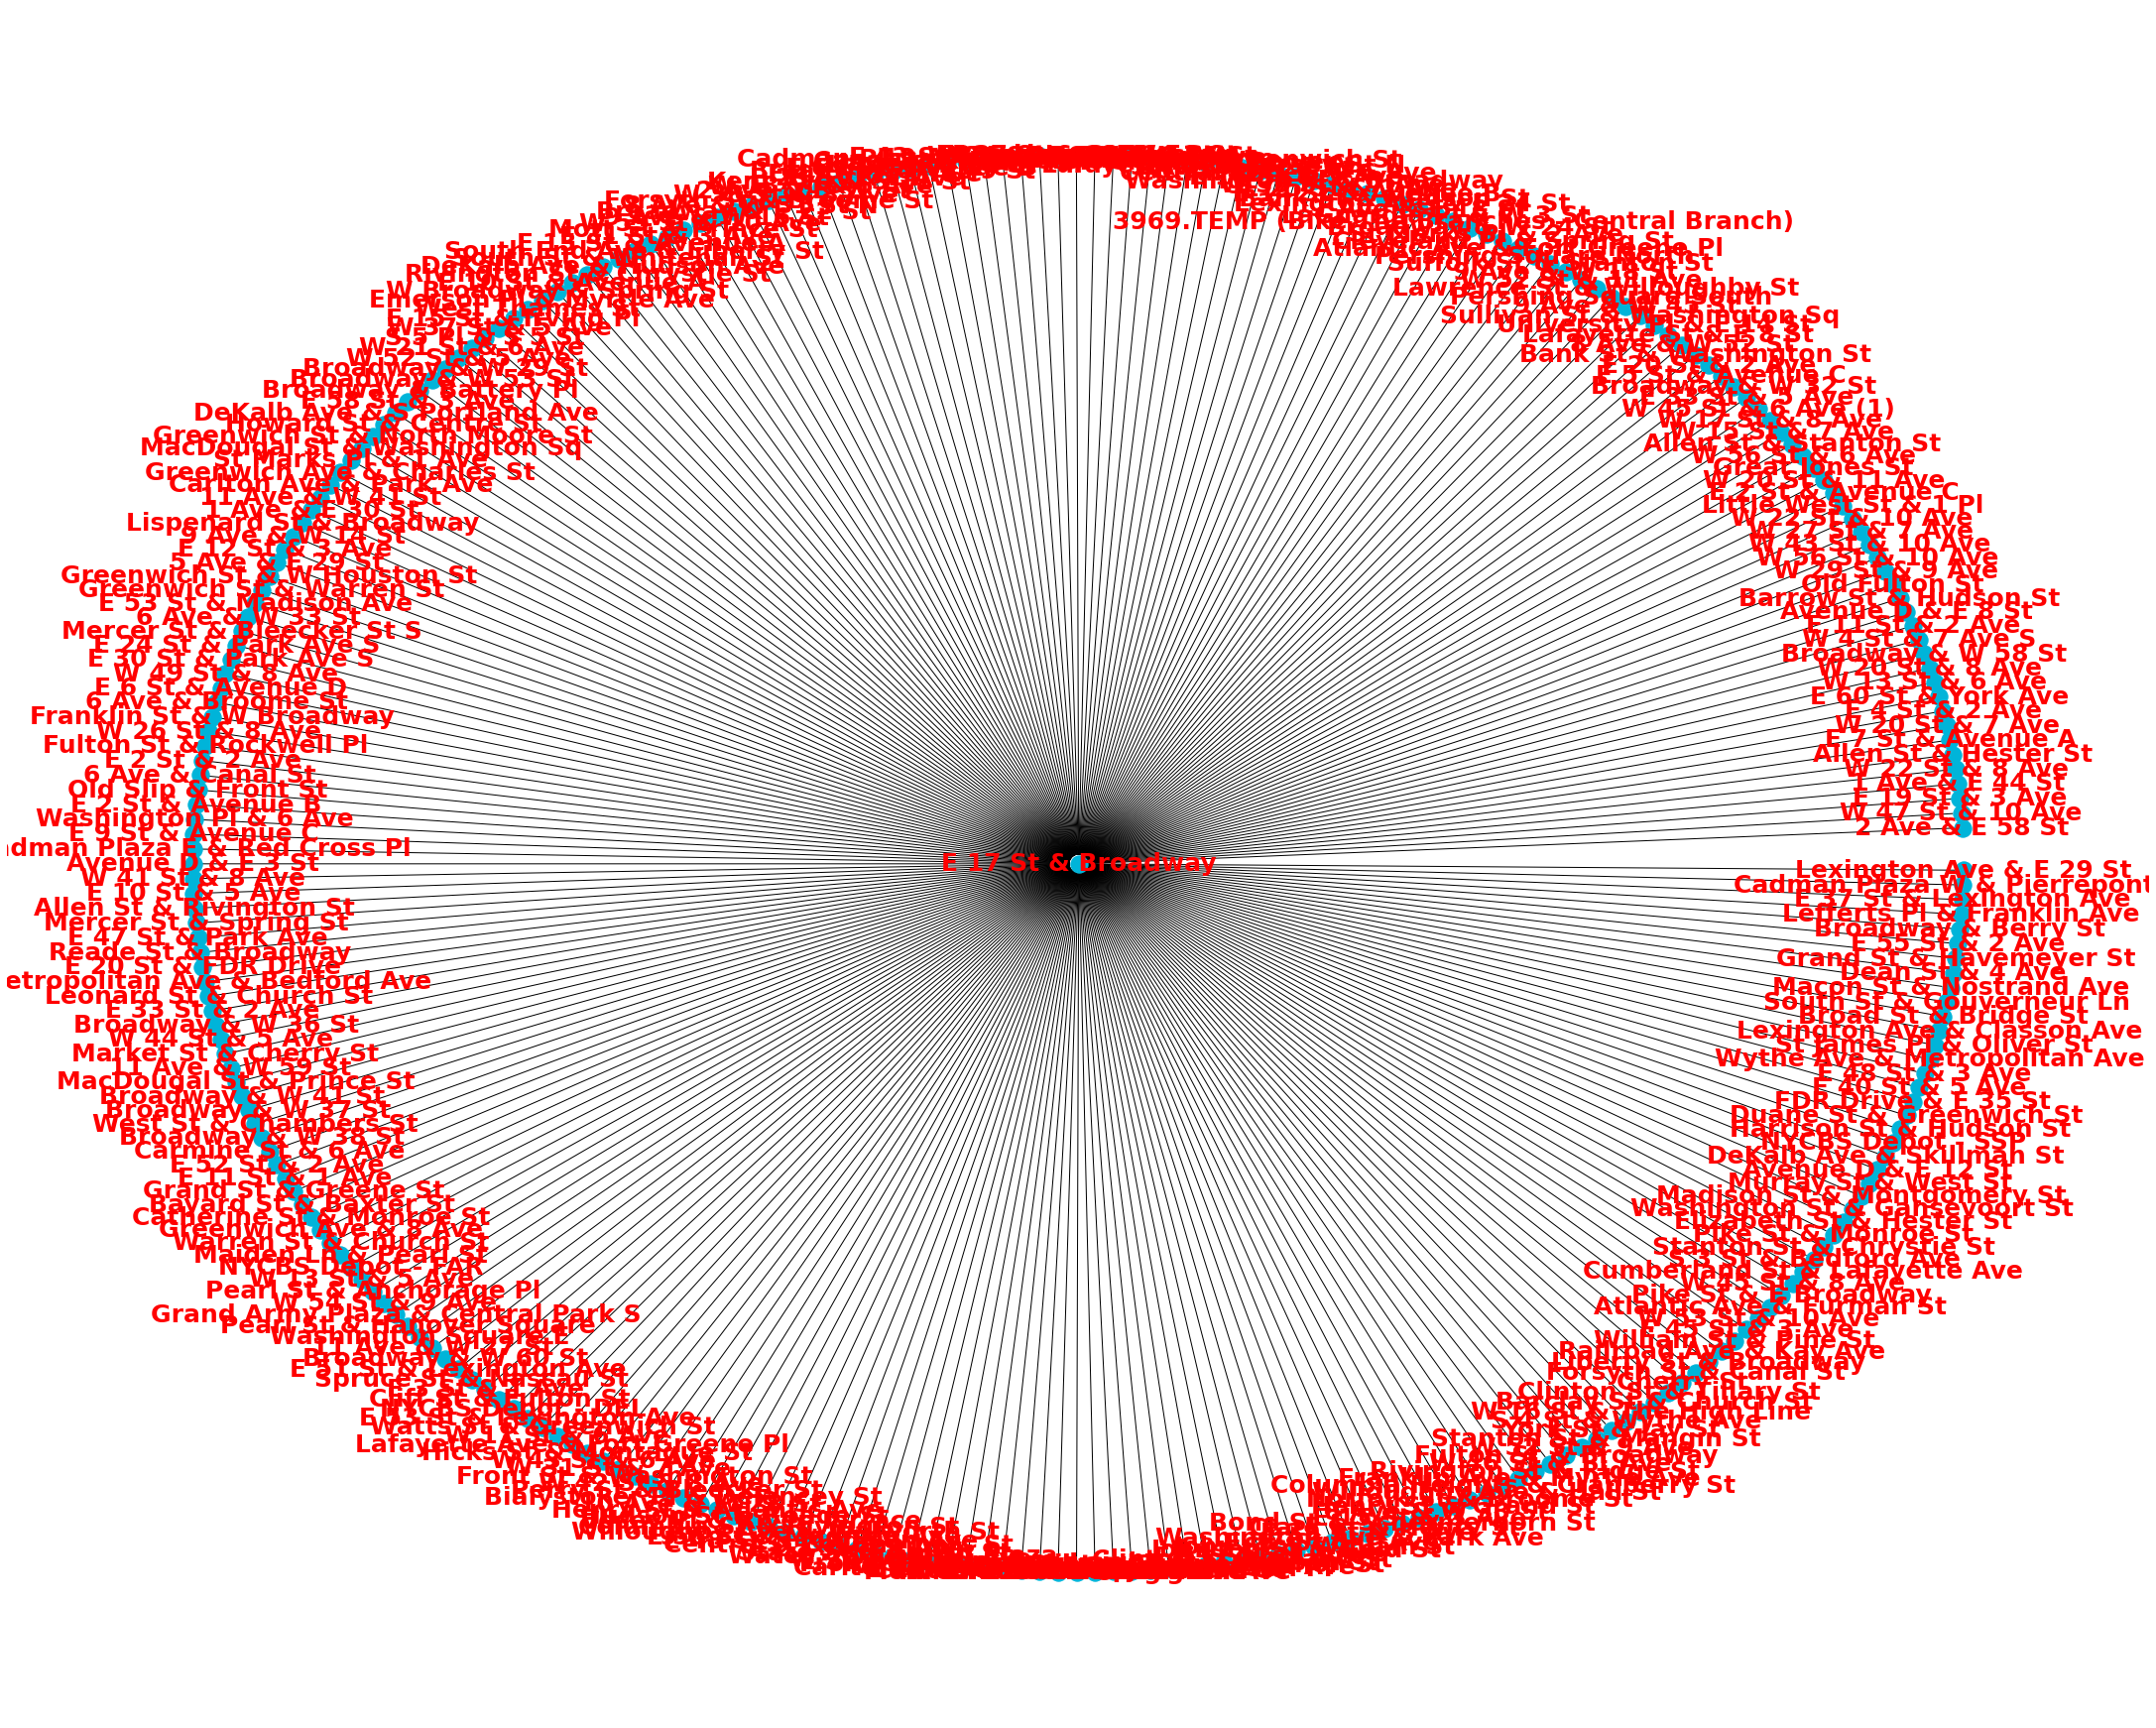

In [17]:
figure(figsize=(30, 24))
nx.draw_kamada_kawai(G_location, arrows=True, with_labels=True,  node_color='#00b4d9'
                     , font_color='red', font_size =25, font_weight='bold')

---

<b>Citation: </b> 

This data is provided according to the NYCBS Data Use Policy. and details can be found on  https://www.citibikenyc.com/system-data

<b>Additional Resources: </b> 

- The City of New York's bicycling data (http://www.nyc.gov/html/dot/html/about/datafeeds.shtml#Bikes)
- The City of New York's bicycling trip data dumps (https://s3.amazonaws.com/tripdata/index.html)
- In Social Network Analysis,  Degree centrality is a simple count of the total number of connections linked to a vertex. It can be thought of as a kind of popularity measure, but a crude one that does not recognize a difference between quantity and quality. Degree centrality does not differentiate between a link to the president of the United States and a link to a high school dropout. Degree is the measure of the total number of edges connected to a particular vertex. For directed networks, there are two measures of degree. In-degree is the number of connections that point inward at a vertex. Out-degree is the number of connections that originate at a vertex and point outward to other vertices.
- Degree centrality is one of the easiest to calculate. The degree centrality of a node is simply its degree—the number of edges it has.The higher the degree, the more central the node is. This can be an effective measure, since many nodes with high degrees also have high centrality by other measures.


---